In [39]:
import pandas as pd
train = pd.read_csv('http://home.agh.edu.pl/~czech/datasets/ed-titanic-training.csv')
test = pd.read_csv('http://home.agh.edu.pl/~czech/datasets/ed-titanic-test.csv').iloc[:,1:]
train.head(3)

,Unnamed: 0,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,1,0,2,0,3,1,1,2,0,3
2,2,1,3,0,1,0,1,0,0,1,1,4


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

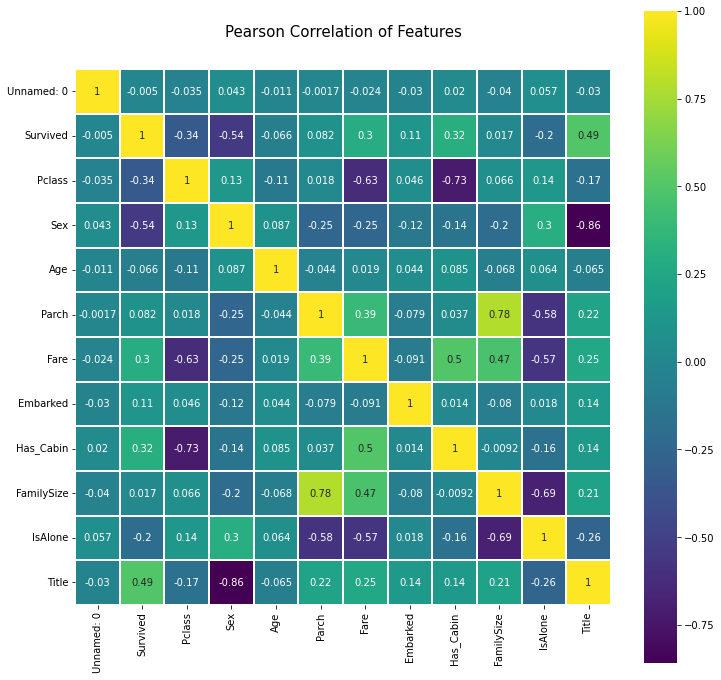

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

In [9]:
title_survived = train.loc[:,['Survived', 'Title']]
title_survived.head(3)

,Survived,Title
0,0,1
1,1,3
2,1,4


In [11]:
title_survived.groupby(['Title']).mean()

,Survived
Title,
1,0.156673
2,0.575000
3,0.793651
4,0.702703
5,0.347826


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, criterion, min_samples, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        for retry in range(1,10):
            tree_model = DecisionTreeClassifier(max_depth=depth, criterion=criterion, min_samples_leaf=min_samples)
            cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
            cv_scores_list.append(cv_scores)
            cv_scores_mean.append(cv_scores.mean())
            cv_scores_std.append(cv_scores.std())
            accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [50]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [51]:
x_train = train.iloc[:,2:]
y_train = train.loc[:,'Survived']

x_train.head(3)

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,1,0,0,0,0,2,0,1
1,1,0,2,0,3,1,1,2,0,3
2,3,0,1,0,1,0,0,1,1,4


In [83]:
# fitting trees of depth 1 to 10
sm_tree_depths = range(1,10)

for criterion in ['gini', 'entropy']:
    for min_samples in range(1,6):
        sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths, criterion=criterion, min_samples=min_samples)

        # plotting accuracy
        plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               f'Accuracy per decision tree depth on training data using {criterion} criterion and {min_samples} samples pear leaf')

AttributeError: 'NoneType' object has no attribute 'mean'

In [33]:
decision_tree = DecisionTreeClassifier(max_depth = 3,criterion='entropy')
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
result = decision_tree.predict(test)
print(result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1]


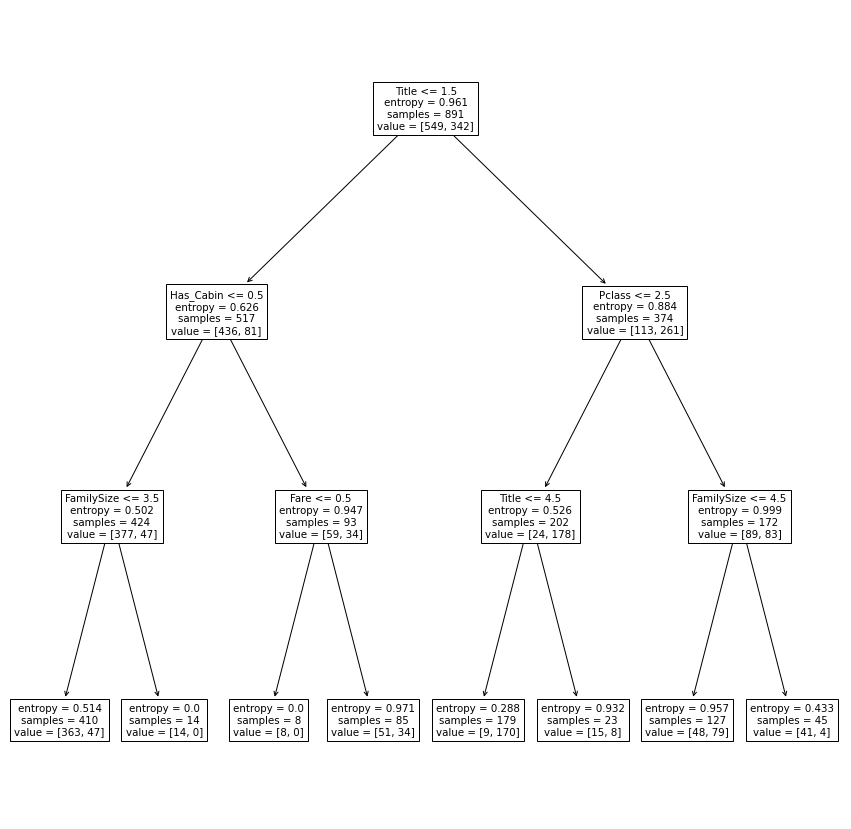

In [48]:
from sklearn.tree import plot_tree
names = test.columns
plt.figure(figsize=(15,15))
_=plot_tree(decision_tree, feature_names=names)

## Zadanie 8 zriobione przy sprawdzaniu cross validation. 

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.25)

In [74]:
decision_tree2 = DecisionTreeClassifier(max_depth = 3,criterion='entropy')
decision_tree2.fit(X_train, Y_train)

result2 = decision_tree2.predict(X_test)

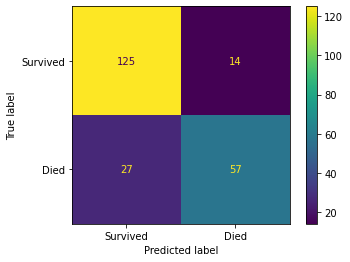

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(Y_test, result2)
ConfusionMatrixDisplay(matrix, display_labels=['Survived','Died']).plot()
plt.show()

In [79]:
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
acc = accuracy_score(Y_test, result2)
f1 = f1_score(Y_test, result2)
aps = average_precision_score(Y_test, result2)
print(f'Accuray = {acc}')
print(f'F1 Score = {f1}')
print(f'Average precision-recall = {aps}')

Accuray = 0.8161434977578476
F1 Score = 0.735483870967742
Average precision-recall = 0.6658448448538767
